In [387]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf


In [388]:
plt.rcParams["figure.figsize"] = (10,10)

In [389]:
path = os.getcwd()

In [449]:
def readPickle(datapath):
    objects = []
    with (open(datapath, "rb")) as openfile:
        while True:
            try:
                objects.append(pickle.load(openfile))
            except EOFError:
                break
    return objects

In [516]:
alg ='MADDPG'

relPath = "../../results/"+alg+"/agentList.pkl"
datapath = os.path.join(path, relPath)
with open(datapath, 'rb') as f:
    agentList = pickle.load(f)
    
relPath = "../../results/"+alg+"/totalReturns.pkl"   
datapath = os.path.join(path, relPath)
objects = readPickle(datapath)
totalReturns = []
for obj in objects:
    totalReturns = totalReturns + obj
    
relPath = "../../results/"+alg+"/loss.pkl"   
datapath = os.path.join(path, relPath)
objects = readPickle(datapath)
loss = []
for obj in objects:
    loss = loss + obj

relPath = "../../results/"+alg+"/congested.pkl"   
datapath = os.path.join(path, relPath)
congested = readPickle(datapath)
relPath = "../../results/"+alg+"/top 5 percent loading.pkl"   
datapath = os.path.join(path, relPath)
percent5 = readPickle(datapath)
relPath = "../../results/"+alg+"/top 2.5 percent loading.pkl"   
datapath = os.path.join(path, relPath)
percent2_5 = readPickle(datapath)

In [517]:
num_iterations = len(loss)
eval_interval = int(len(loss)/len(totalReturns))
ret_steps = range(1, num_iterations + 1, eval_interval)
loss_steps = range(1, num_iterations + 1)

In [518]:
agentList

['k14n3h24_149_nsPVErsatzeinsp',
 'k29n8h140_100_nsPVErsatzeinsp',
 'k36n25h852_58_nsPVErsatzeinsp',
 'k69dea_262_wea',
 'k79dea_267_wea',
 'k126dea_270_wea',
 'k109d_BatteryStorage',
 'k74d_BatteryStorage',
 'k35d_BatteryStorage',
 'k49n16h408_595_nsEmobErsatzLast.2',
 'k36n25h843_478_nsEmobErsatzLast',
 'k49n16h451_306_nsEmobErsatzLast.1',
 'k14n3h29_73_nsWPErsatzlast_flex',
 'k33n10h201_28_nsWPErsatzlast_flex',
 'k49n16h466_127_nsWPErsatzlast_flex',
 'k49n16b58_nsBetrieb_Business Base_flex',
 'k29n8b110_nsBetrieb_BusinessPeak_flex',
 'k60n22b62_nsBetrieb_BusinessPeak_flex']

In [522]:
totalReturns = totalReturns[:200]
loss = loss[:200]
num_iterations = 200
eval_interval = 1
ret_steps = range(1, num_iterations+1, eval_interval)
loss_steps = range(1, num_iterations + 1)

In [528]:
def returnPlot(num, agent):
    agent_returns = [ret[num] for ret in totalReturns]
    plt.plot(ret_steps, agent_returns, 'tab:purple')
    plt.xlabel("Step")
#     plt.ylabel('Avg Return - {}'.format(agentList[num]))
    plt.ylabel('Avg Return - {} agent'.format(agent))
    plt.xticks(range(0, num_iterations, 20))
    relPath = "../../results/"+alg+"/"+agentList[num]+".pdf"
    datapath = os.path.join(path, relPath)
    plt.savefig(datapath)
    plt.show()
    plt.clf()

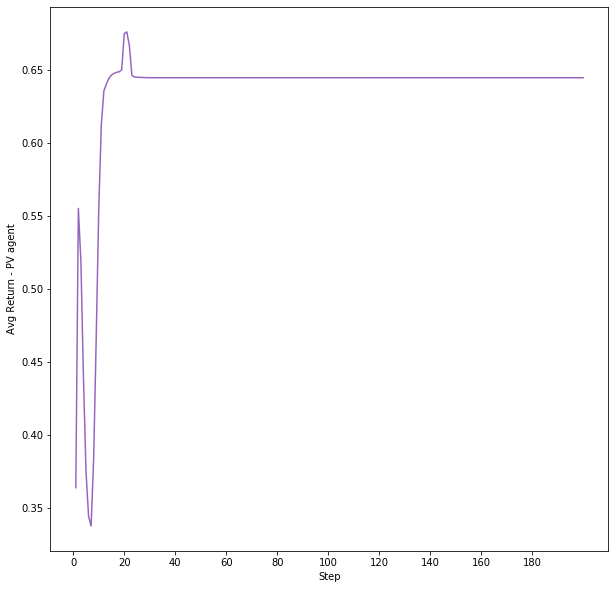

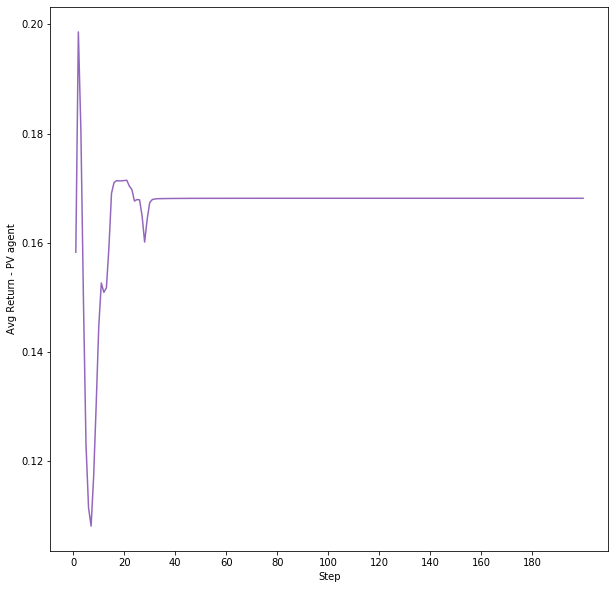

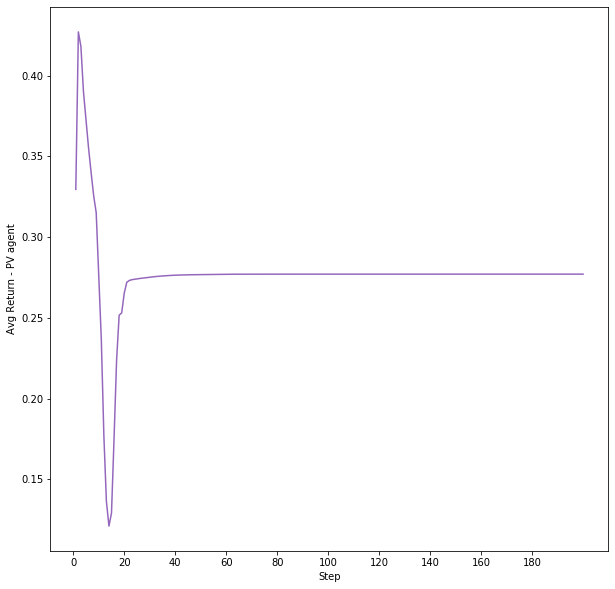

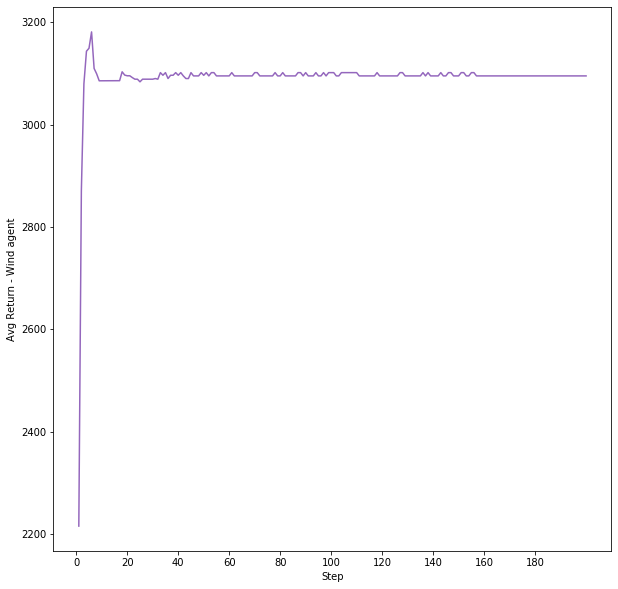

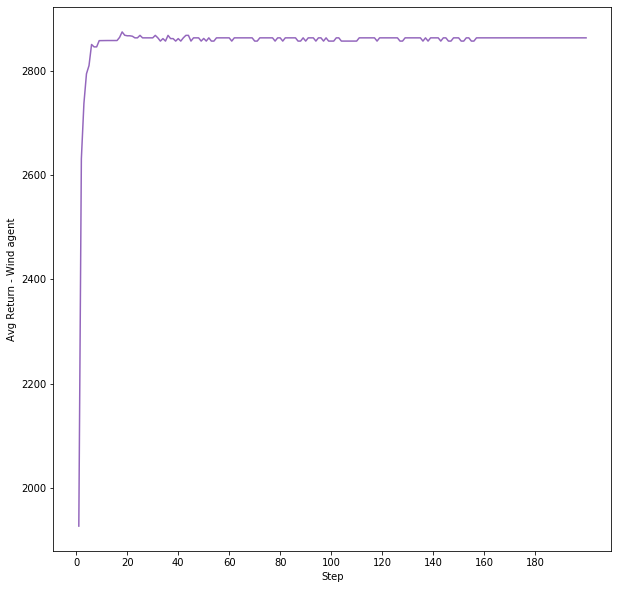

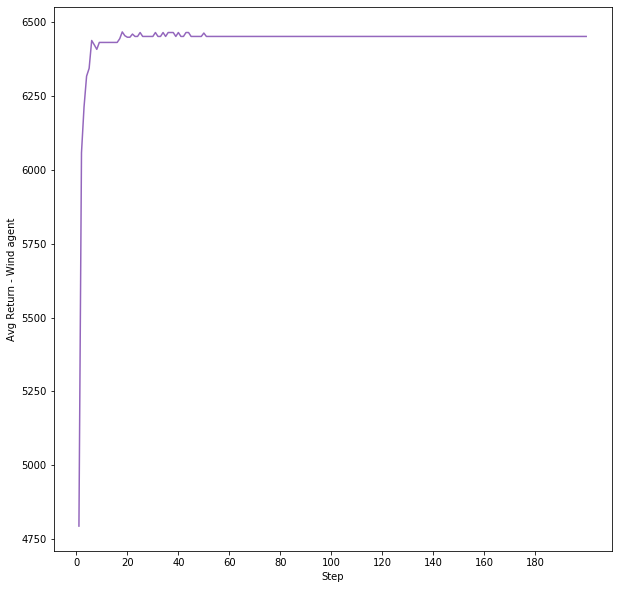

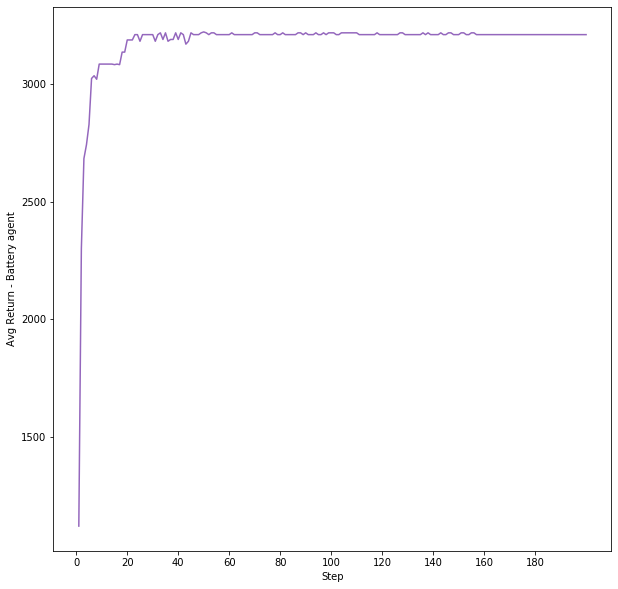

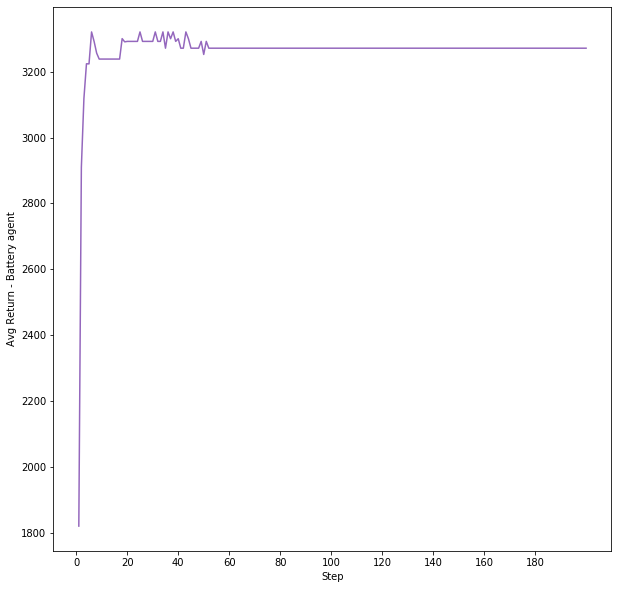

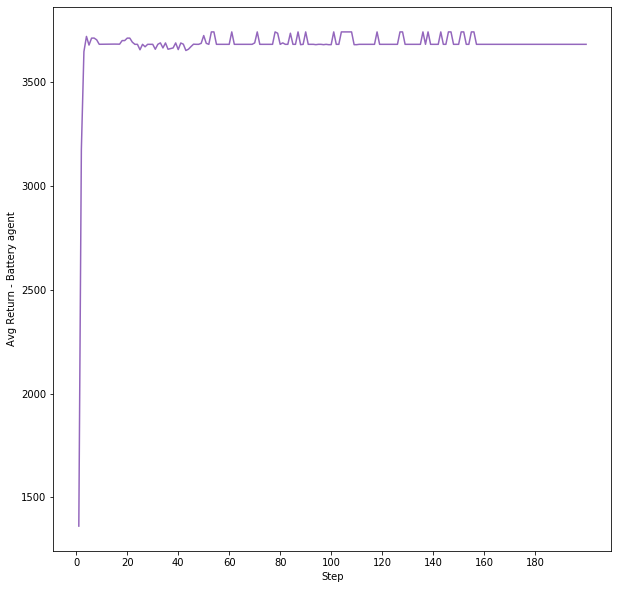

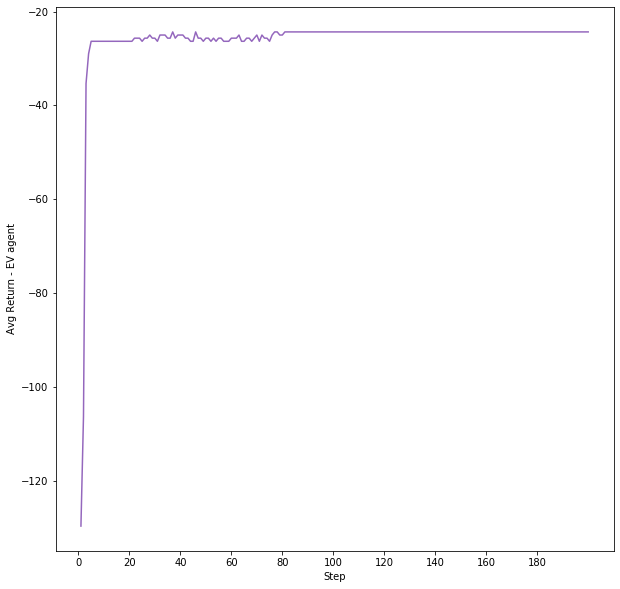

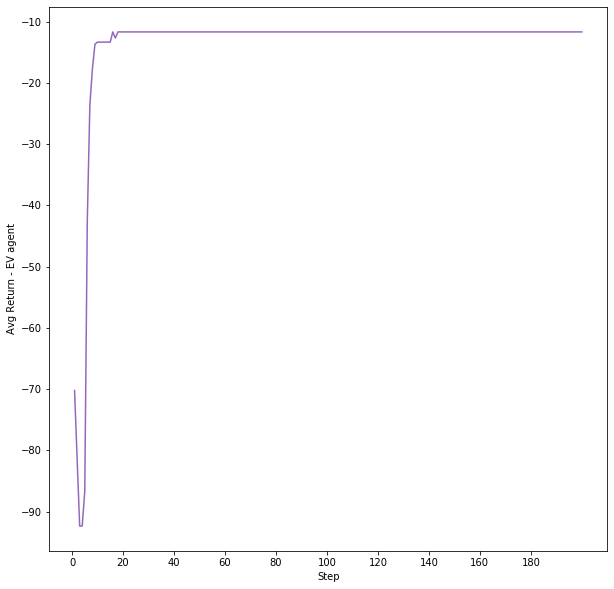

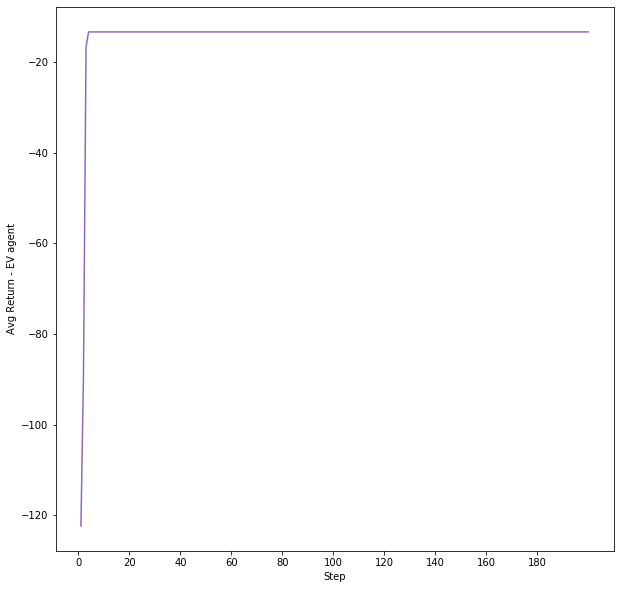

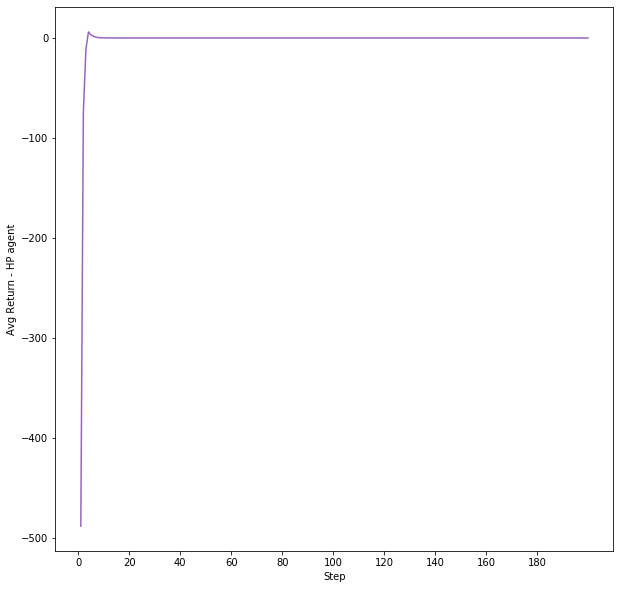

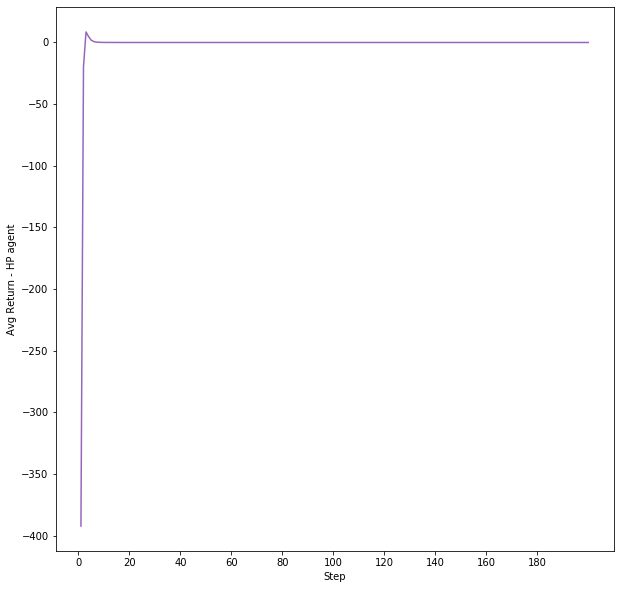

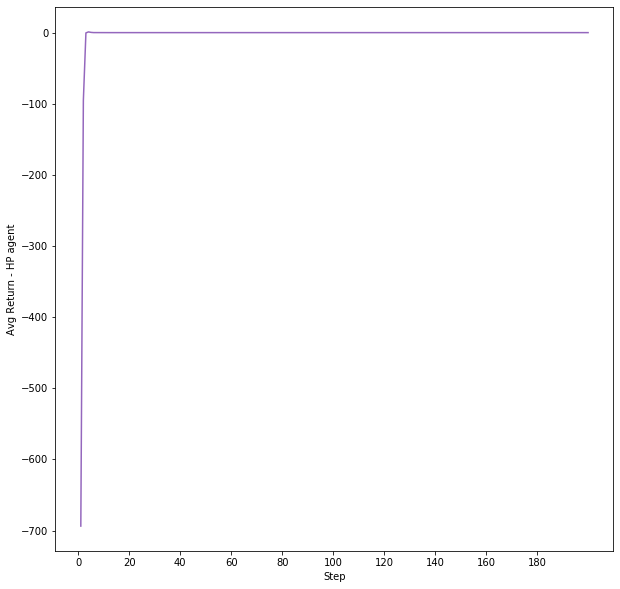

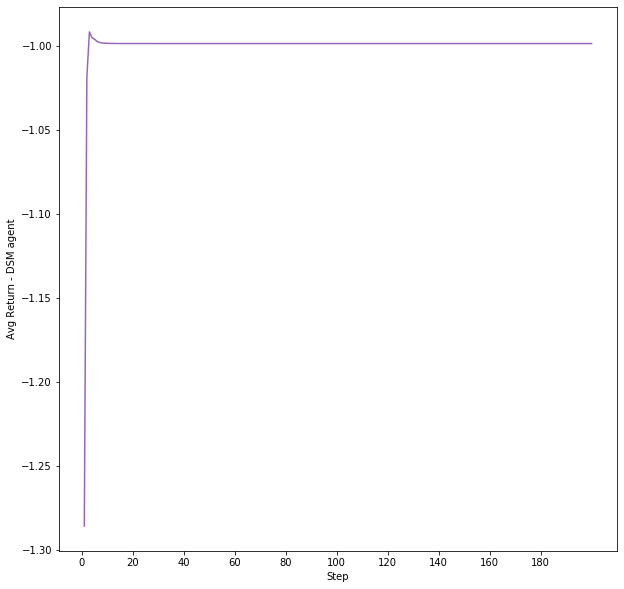

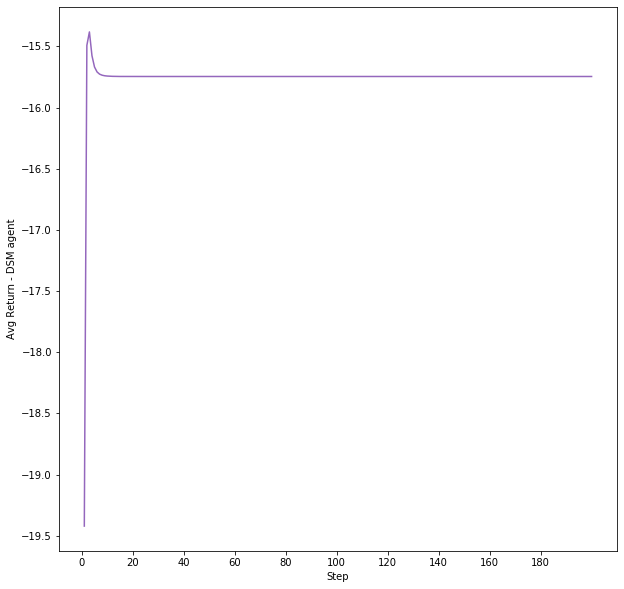

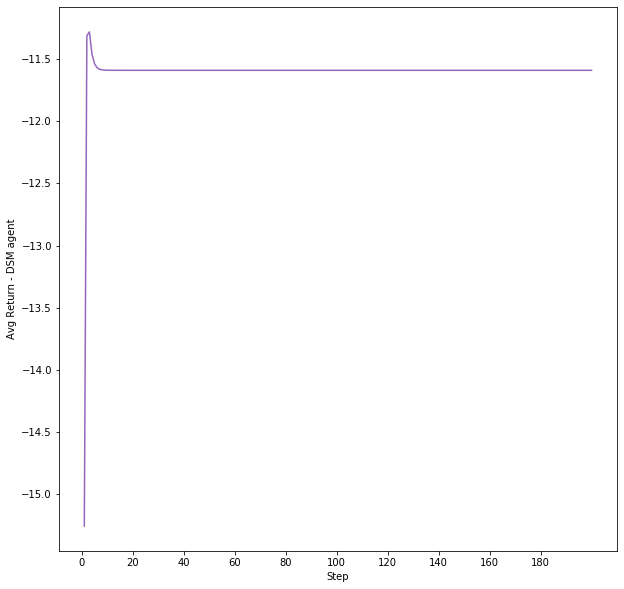

<Figure size 720x720 with 0 Axes>

In [529]:
returnPlot(0, "PV")
returnPlot(1, "PV")
returnPlot(2, "PV")
returnPlot(3, "Wind")
returnPlot(4, "Wind")
returnPlot(5, "Wind")
returnPlot(6, "Battery")
returnPlot(7, "Battery")
returnPlot(8, "Battery")
returnPlot(9, "EV")
returnPlot(10, "EV")
returnPlot(11, "EV")
returnPlot(12, "HP")
returnPlot(13, "HP")
returnPlot(14, "HP")
returnPlot(15, "DSM")
returnPlot(16, "DSM")
returnPlot(17, "DSM")

In [386]:
# plt.plot(loss_steps, loss)
# plt.show()

In [481]:
relPath = "../../results/"+alg+"/Actions.pkl"   
datapath = os.path.join(path, relPath)
objects = readPickle(datapath)
Actions = []
for obj in objects:
    Actions = Actions + list(obj)

In [497]:
ActCollectAndEval = [a for i, a in enumerate(Actions) if (i+0)%18==0]
Act = []
for i, a in enumerate(ActCollectAndEval):
    if i%(period+2*eval_interval)>2*eval_interval-1:
        Act.append(a)
Act

[array([[ 0.4459908 ,  0.6902051 ,  0.67304164,  0.5392982 ,  0.72693   ,
          0.77054787,  0.40139928,  0.46625572,  0.7980205 ,  0.795282  ,
          0.66267747,  0.6911309 ,  0.65443796,  0.56115204,  0.7395751 ,
          0.6249829 ,  0.5195346 ,  0.80163974,  0.73766965,  0.5852252 ,
          0.70466316,  0.6752424 ,  0.319969  ,  0.69536805, -0.79937756,
         -0.48212823, -0.70551693, -0.7795757 , -0.5505294 , -0.794842  ,
         -0.71559477, -0.7113173 , -0.58552843, -0.7333008 , -0.6816509 ,
         -0.6250818 , -0.7684959 , -0.84324884, -0.8174587 , -0.74869233,
         -0.8017817 , -0.7715954 , -0.66960716, -0.71156013, -0.721799  ,
         -0.68711185, -0.7968458 , -0.810922  ,  1.8668005 ,  1.7410486 ,
          1.3623451 ,  1.5356622 ,  1.6974503 ,  1.8007642 ,  1.7034441 ,
          1.6887174 ,  1.7013648 ,  1.8019378 ,  1.7169487 ,  1.7652205 ,
          1.657976  ,  1.4460998 ,  1.8206179 ,  1.7863661 ,  1.4558175 ,
          1.6704409 ,  1.7594005 ,  1.

In [506]:
def convergencePlot(num, agent):
    nAgents = 18
    period = 30
    eval_interval = 10
    ActCollectAndEval = [a for i, a in enumerate(Actions) if i%nAgents==num]
    Act = []
    for i, a in enumerate(ActCollectAndEval):
        if i%(period+2*eval_interval)>2*eval_interval-1:
            Act.append(a)
    sbm, fbm, fpm = [], [], []
    for i in range(1, 50):
#     for i in range(1, len(Act)-1):
        val_sbm, val_fbm, val_fpm = 0.0, 0.0, 0.0
        for n in range(24):
            val_sbm += abs(Act[i+1][0][n] - Act[i][0][n])
        val_sbm /= 24
        sbm.append(val_sbm)
        for n in range(24, 48):
            val_fbm += abs(Act[i+1][0][n] - Act[i][0][n])
        val_fbm /= 24
        fbm.append(val_fbm)
        for n in range(48, 72):
            val_fpm += abs(Act[i+1][0][n] - Act[i][0][n])
        val_fpm /= 24
        fpm.append(val_fpm)

    plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Accent(np.linspace(0, 1, 3))))
    steps = range(len(sbm))
    plt.plot(steps, sbm)
    plt.plot(steps, fbm)
    plt.plot(steps, fpm)
    plt.xlabel("Step")
    plt.ylabel('Avg relative change in actions_{} agent'.format(agent))

    plt.legend(['Spot bid multiplier', 'Flex bid multiplier', 'Flex bid price multiplier'], loc='upper right')
    relPath = "../../results/"+alg+"/convergence_"+agent+".pdf"
    datapath = os.path.join(path, relPath)
    plt.savefig(datapath)
    plt.show()
    plt.clf()

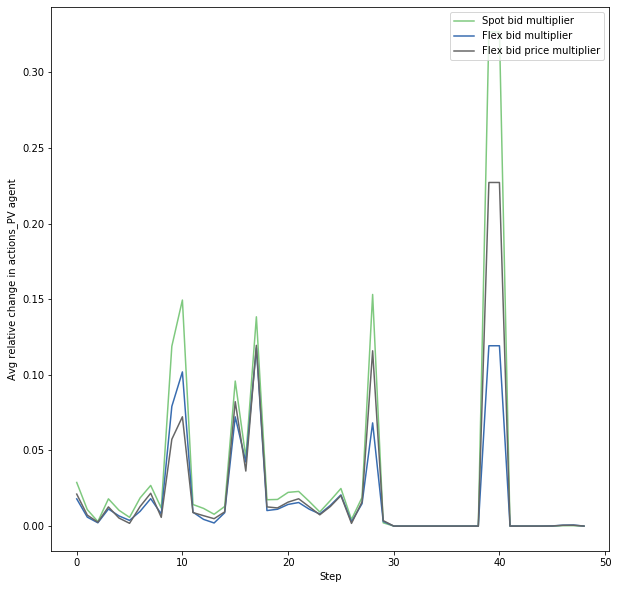

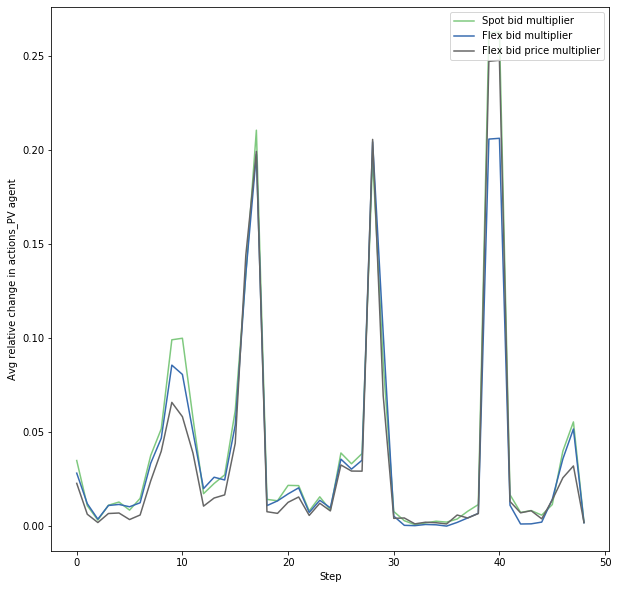

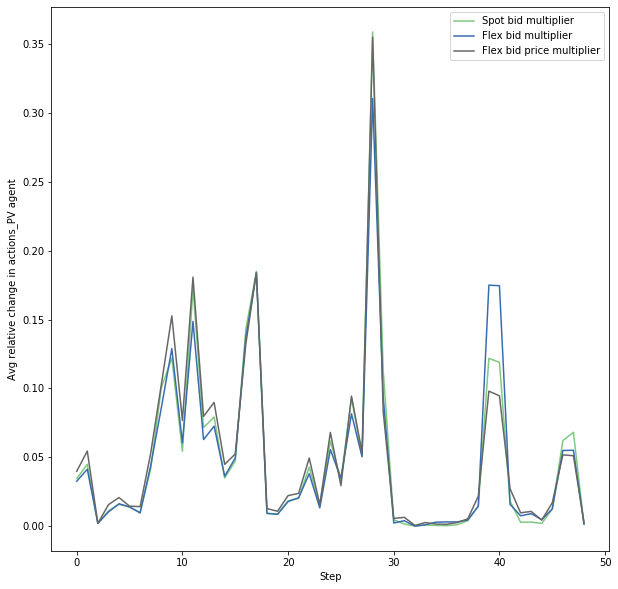

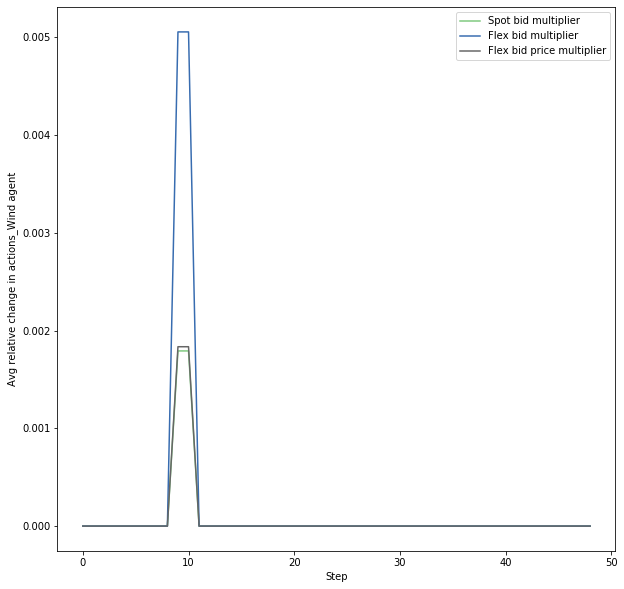

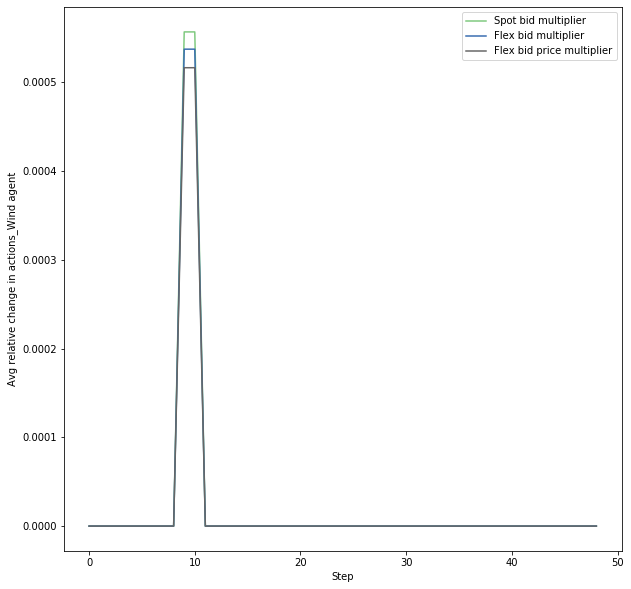

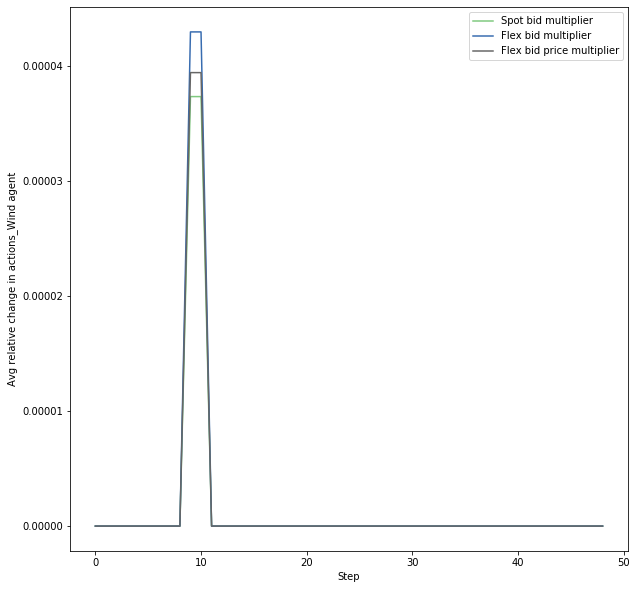

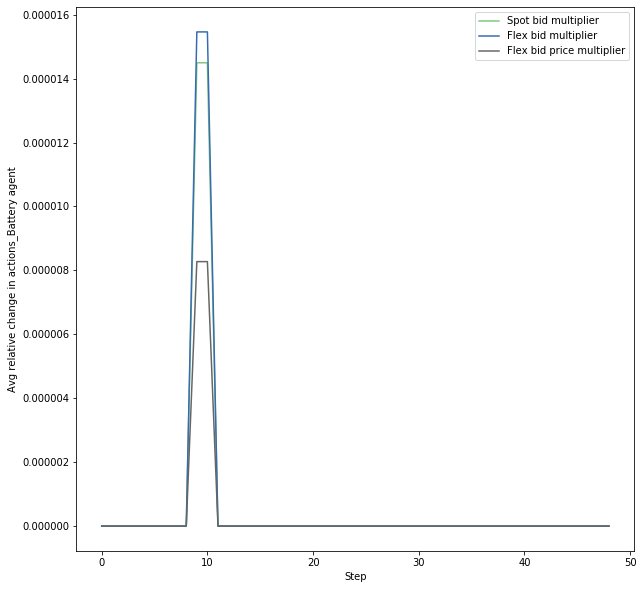

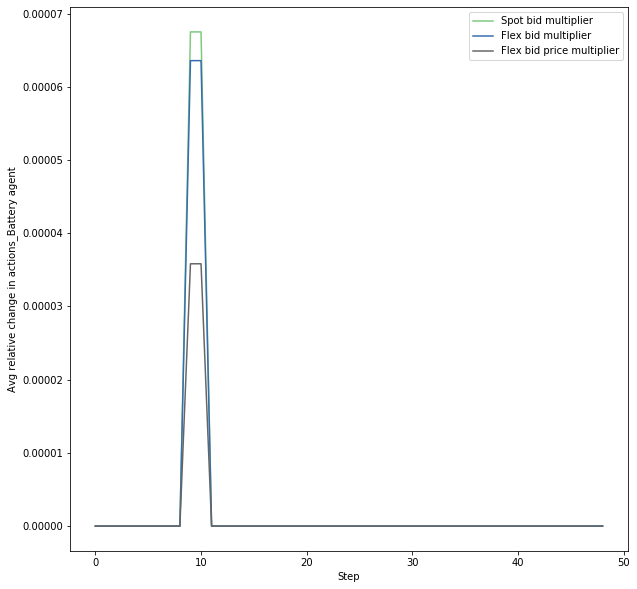

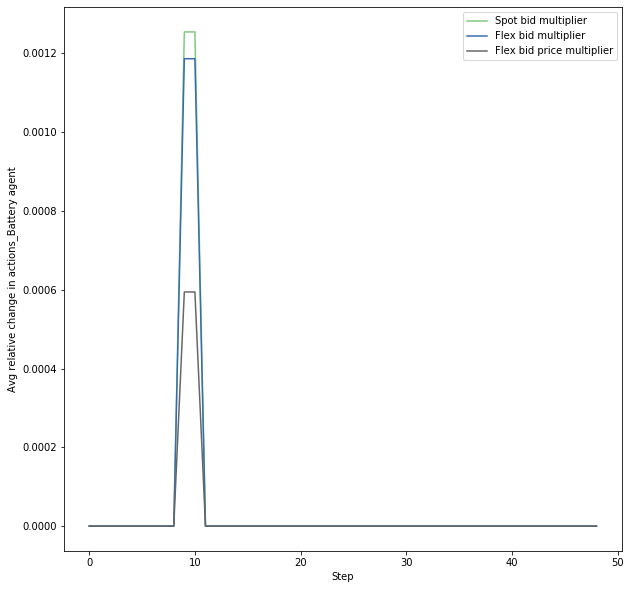

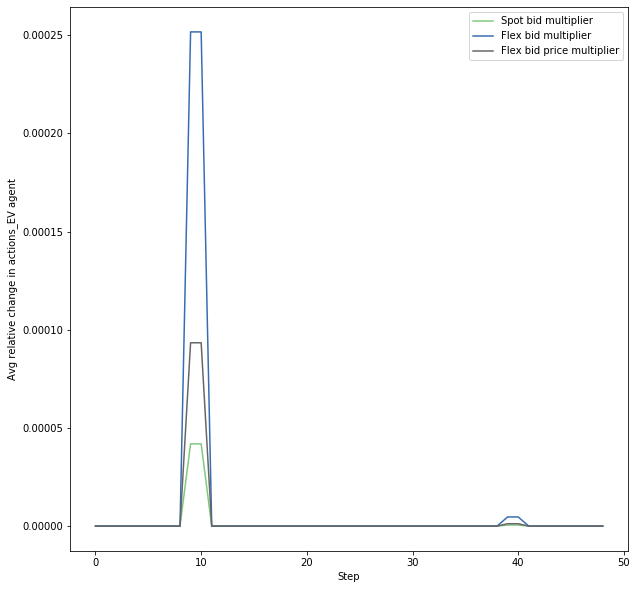

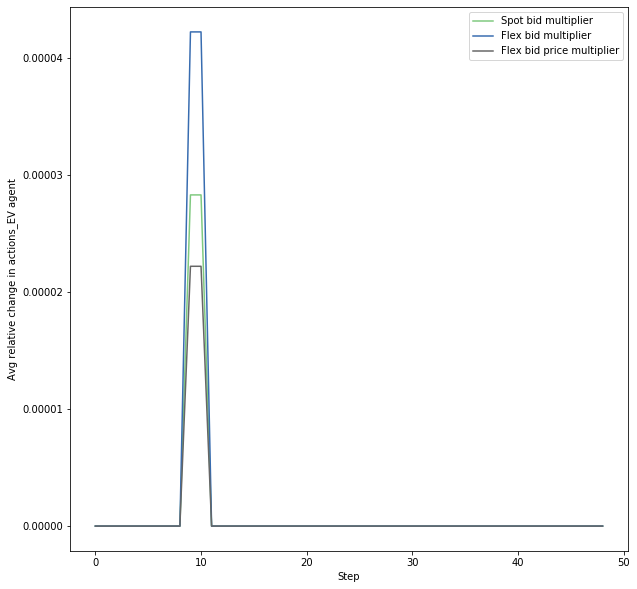

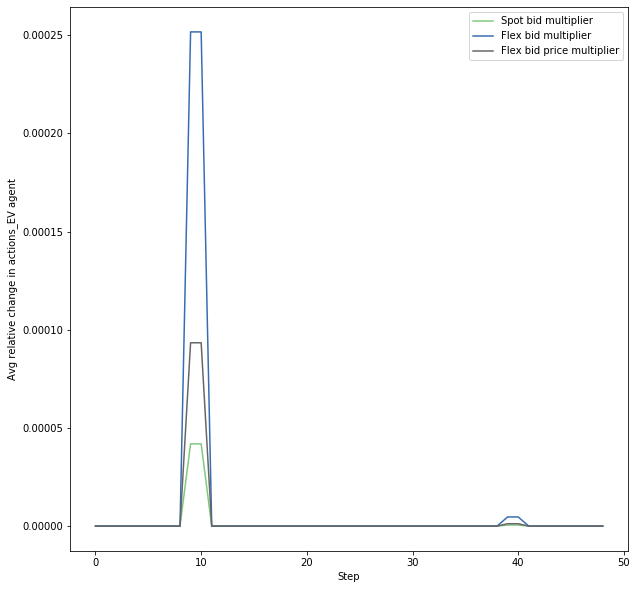

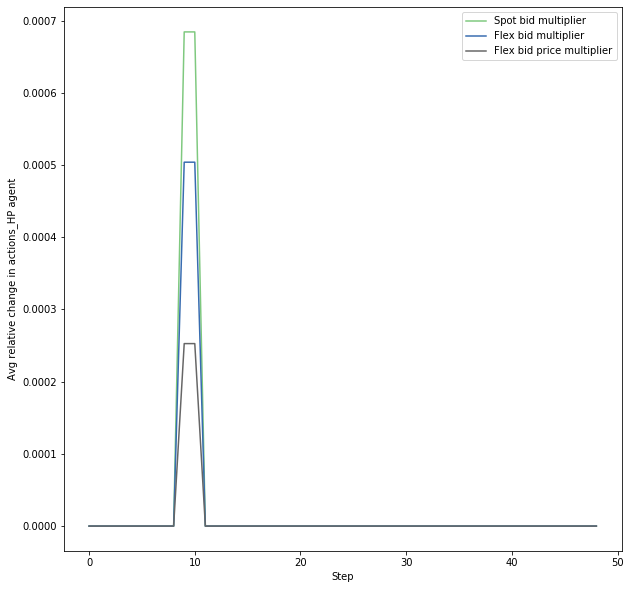

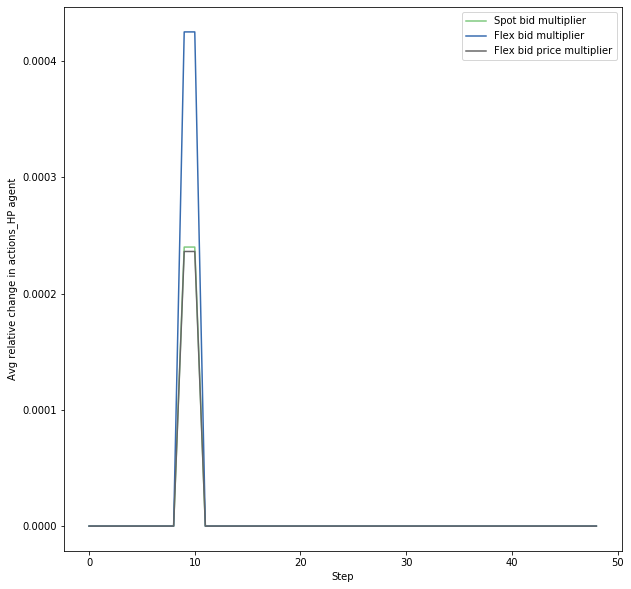

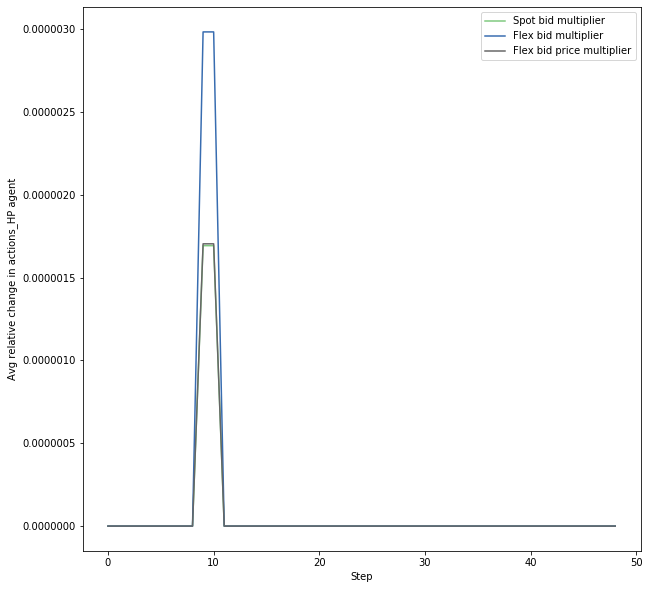

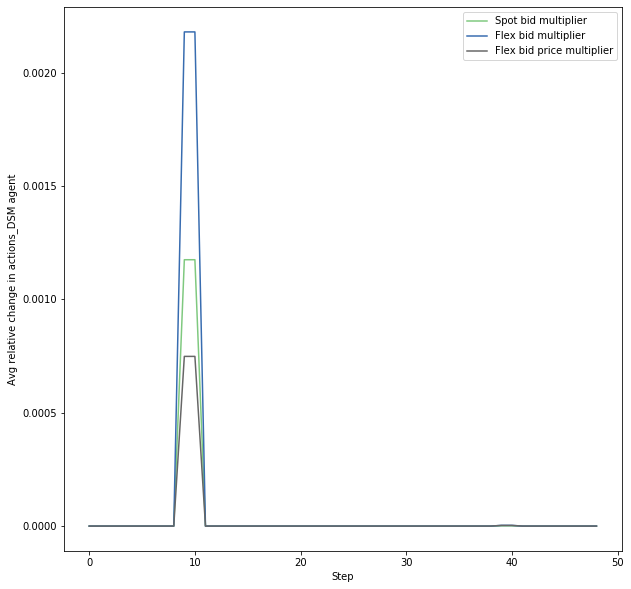

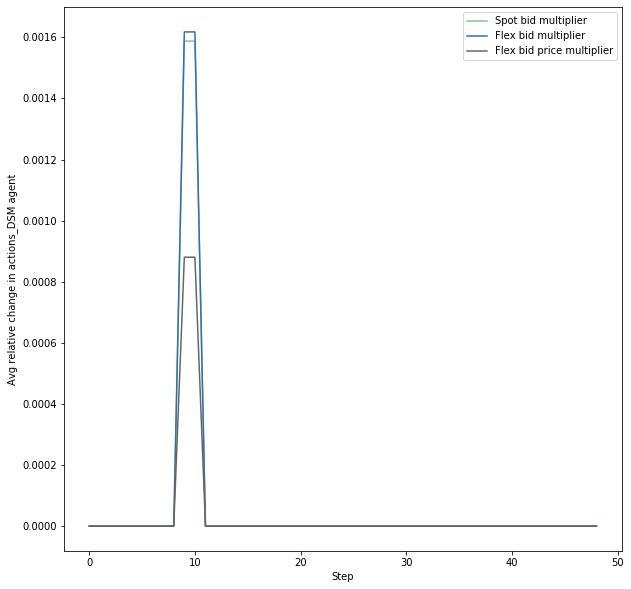

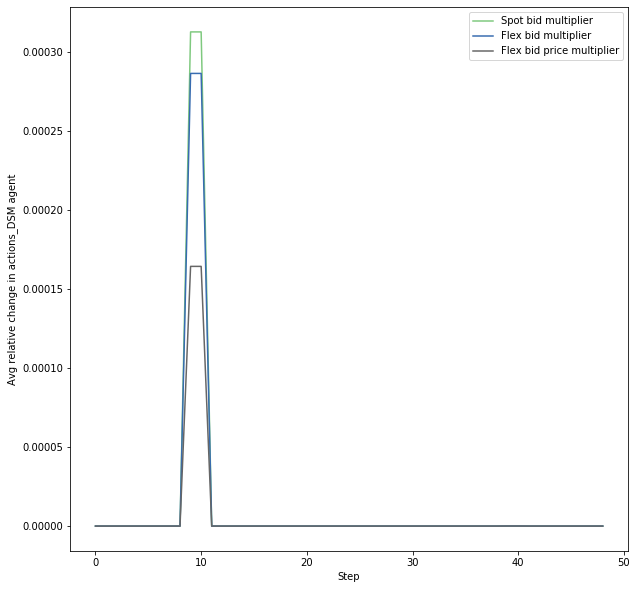

<Figure size 720x720 with 0 Axes>

In [507]:
convergencePlot(0, "PV")
convergencePlot(1, "PV")
convergencePlot(2, "PV")
convergencePlot(3, "Wind")
convergencePlot(4, "Wind")
convergencePlot(5, "Wind")
convergencePlot(6, "Battery")
convergencePlot(7, "Battery")
convergencePlot(8, "Battery")
convergencePlot(9, "EV")
convergencePlot(10, "EV")
convergencePlot(11, "EV")
convergencePlot(12, "HP")
convergencePlot(13, "HP")
convergencePlot(14, "HP")
convergencePlot(15, "DSM")
convergencePlot(16, "DSM")
convergencePlot(17, "DSM")
# convergencePlot(0, "PV")
# convergencePlot(1, "Wind")
# convergencePlot(2, "Battery")
# convergencePlot(3, "EV")
# convergencePlot(4, "HP")
# convergencePlot(5, "DSM")